# Example 14 - Three Point Problem



This example will show how to convert the geological map below using ``GemGIS`` to a `GemPy` model. This example is based on digitized data. The area is 2973 m wide (W-E extent) and 3698 m high (N-S extent). The vertical model extent varies between 0 m and 1000 m. This example represents a classic "three-point-problem" of planar dipping layers (blue and purple) above an unspecified basement. The interface points were not recorded at the surface but rather in boreholes at depth.

The map has been georeferenced with QGIS. The outcrops of the layers were digitized in QGIS. The contour lines were also digitized and will be interpolated with `GemGIS` to create a topography for the model. 

Map Source: An Introduction to Geological Structures and Maps by G.M. Bennison

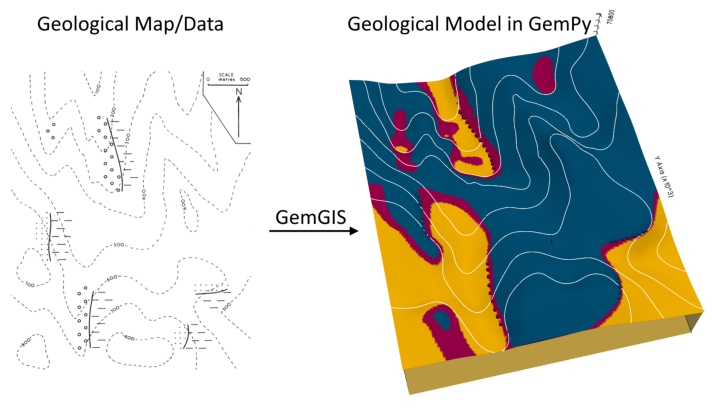

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('../images/cover_example14.png')
plt.figure(figsize=(10, 10))
imgplot = plt.imshow(img)
plt.axis('off')
plt.tight_layout()

## Licensing

Computational Geosciences and Reservoir Engineering, RWTH Aachen University, Authors: Alexander Juestel. For more information contact: alexander.juestel(at)rwth-aachen.de


This work is licensed under a Creative Commons Attribution 4.0 International License (http://creativecommons.org/licenses/by/4.0/)

## Import GemGIS

If you have installed ``GemGIS`` via pip or conda, you can import ``GemGIS`` like any other package. If you have downloaded the repository, append the path to the directory where the ``GemGIS`` repository is stored and then import ``GemGIS``. 

In [2]:
import warnings
warnings.filterwarnings("ignore")
import gemgis as gg

## Importing Libraries and loading Data

All remaining packages can be loaded in order to prepare the data and to construct the model. The example data is downloaded from an external server using `pooch`. It will be stored in a data folder in the same directory where this notebook is stored.  

In [3]:
import geopandas as gpd
import rasterio 

In [4]:
file_path = 'data/example14/'
gg.download_gemgis_data.download_tutorial_data(filename="example14_three_point_problem.zip", dirpath=file_path)

## Creating Digital Elevation Model from Contour Lines

The digital elevation model (DEM) will be created by interpolating contour lines digitized from the georeferenced map using the `SciPy` Radial Basis Function interpolation wrapped in `GemGIS`. The respective function used for that is `gg.vector.interpolate_raster()`. 


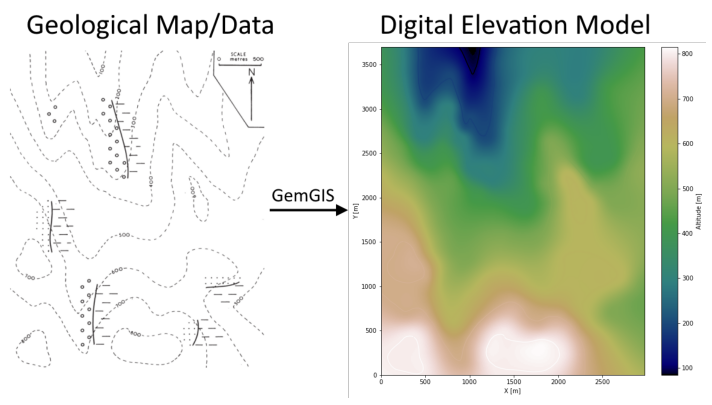

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('../images/dem_example14.png')
plt.figure(figsize=(10, 10))
imgplot = plt.imshow(img)
plt.axis('off')
plt.tight_layout()

In [6]:
topo = gpd.read_file(file_path + 'topo14.shp')
topo.head()

,id,Z,geometry
0,None,800,"LINESTRING (373.021 427.168, 400.177 396.582, ..."
1,None,800,"LINESTRING (1394.650 431.742, 1406.656 411.732..."
2,None,700,"LINESTRING (3.131 921.975, 58.014 877.954, 104..."
3,None,700,"LINESTRING (263.826 1502.823, 293.269 1491.960..."
4,None,600,"LINESTRING (2110.419 2231.741, 2145.293 2212.3..."


### Interpolating the contour lines

In [7]:
topo_raster = gg.vector.interpolate_raster(gdf=topo, value='Z', method='rbf', res=15)

### Plotting the raster

(0.0, 3698.0)

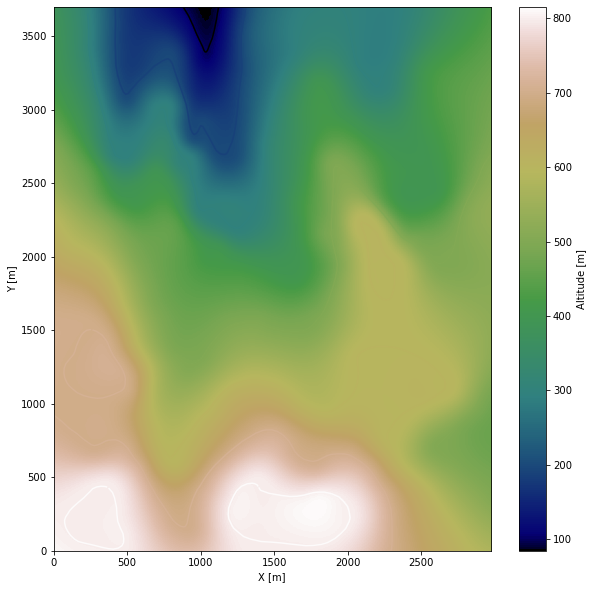

In [8]:
import matplotlib.pyplot as plt

fix, ax = plt.subplots(1, figsize=(10, 10))
topo.plot(ax=ax, aspect='equal', column='Z', cmap='gist_earth')
im = plt.imshow(topo_raster, origin='lower', extent=[0, 2973, 0, 3698], cmap='gist_earth')
cbar = plt.colorbar(im)
cbar.set_label('Altitude [m]')
ax.set_xlabel('X [m]')
ax.set_ylabel('Y [m]')
ax.set_xlim(0, 2973)
ax.set_ylim(0, 3698)

### Saving the raster to disc

After the interpolation of the contour lines, the raster is saved to disc using `gg.raster.save_as_tiff()`. The function will not be executed as a raster is already provided with the example data. 

### Opening Raster

The previously computed and saved raster can now be opened using rasterio. 

In [9]:
topo_raster = rasterio.open(file_path + 'raster14.tif')

## Interface Points of stratigraphic boundaries

The interface points for this three point example will be digitized as points with the respective height value as given by the contour lines and the respective formation.  


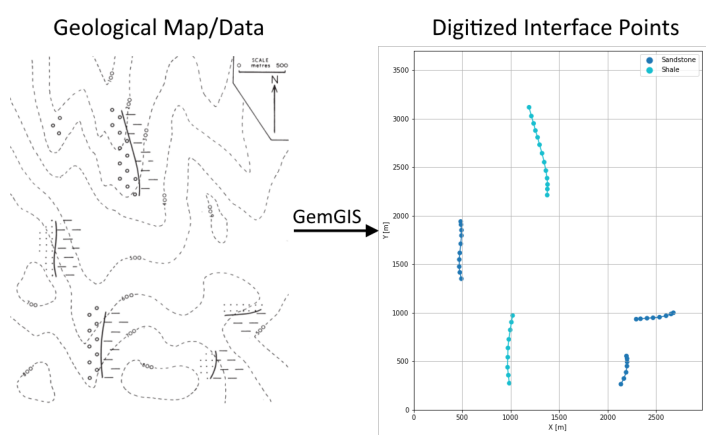

In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('../images/interfaces_example14.png')
plt.figure(figsize=(10, 10))
imgplot = plt.imshow(img)
plt.axis('off')
plt.tight_layout()

In [11]:
interfaces = gpd.read_file(file_path + 'interfaces14.shp')
interfaces.head()

,id,formation,geometry
0,None,Sandstone,"LINESTRING (491.899 1350.893, 476.463 1416.067..."
1,None,Shale,"LINESTRING (986.420 273.809, 976.701 356.706, ..."
2,None,Sandstone,"LINESTRING (2137.825 264.091, 2168.697 322.404..."
3,None,Sandstone,"LINESTRING (2295.614 934.124, 2339.635 938.126..."
4,None,Shale,"LINESTRING (1190.517 3118.020, 1213.957 3027.6..."


### Extracting Z coordinate from Digital Elevation Model

In [12]:
interfaces_coords = gg.vector.extract_xyz(gdf=interfaces, dem=topo_raster)
interfaces_coords.head()

,formation,geometry,X,Y,Z
0,Sandstone,POINT (491.899 1350.893),491.90,1350.89,663.18
1,Sandstone,POINT (476.463 1416.067),476.46,1416.07,656.31
2,Sandstone,POINT (470.174 1476.096),470.17,1476.10,643.79
3,Sandstone,POINT (470.746 1548.702),470.75,1548.70,625.64
4,Sandstone,POINT (475.891 1617.306),475.89,1617.31,607.52


### Plotting the Interface Points

(0.0, 3698.0)

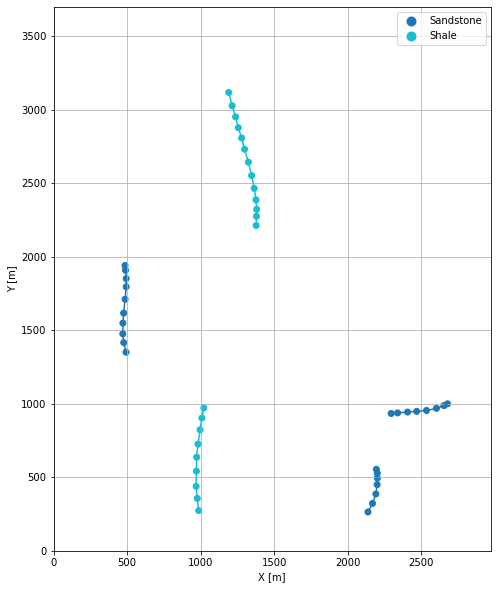

In [13]:
fig, ax = plt.subplots(1, figsize=(10, 10))

interfaces.plot(ax=ax, column='formation', legend=True, aspect='equal')
interfaces_coords.plot(ax=ax, column='formation', legend=True, aspect='equal')
plt.grid()
ax.set_xlabel('X [m]')
ax.set_ylabel('Y [m]')
ax.set_xlim(0, 2973)
ax.set_ylim(0, 3698)

## Orientations from Strike Lines

For this three point example, an orientation is calculated using `gg.vector.calculate_orientation_for_three_point_problem()`. 


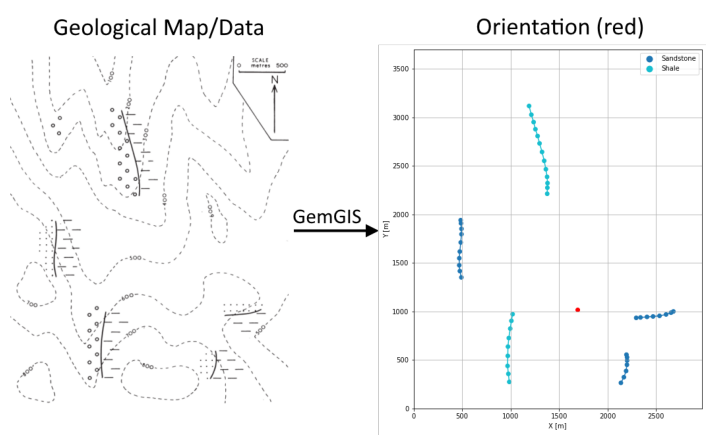

In [14]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('../images/orientations_example14.png')
plt.figure(figsize=(10, 10))
imgplot = plt.imshow(img)
plt.axis('off')
plt.tight_layout()

In [15]:
orientations = gpd.read_file(file_path + 'orientations14.shp')
orientations

,id,formation,Z,geometry
0,None,Sandstone,600,POINT (477.321 1628.597)
1,None,Sandstone,700,POINT (2201.427 477.764)
2,None,Sandstone,600,POINT (2390.088 942.556)


In [16]:
orientations = gg.vector.calculate_orientation_for_three_point_problem(gdf=orientations)
orientations

,Z,formation,azimuth,dip,polarity,X,Y,geometry
0,633.33,Sandstone,-160.27,168.72,1,1689.61,1016.31,POINT (1689.612 1016.306)


### Changing the Data Type of Fields

In [17]:
orientations['Z'] = orientations['Z'].astype(float)
orientations['azimuth'] = orientations['azimuth'].astype(float)
orientations['dip'] = orientations['dip'].astype(float)
orientations['dip'] = 180 - orientations['dip']
orientations['azimuth'] = 180 - orientations['azimuth']
orientations['polarity'] = orientations['polarity'].astype(float)
orientations['X'] = orientations['X'].astype(float)
orientations['Y'] = orientations['Y'].astype(float)
orientations.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Z          1 non-null      float64 
 1   formation  1 non-null      object  
 2   azimuth    1 non-null      float64 
 3   dip        1 non-null      float64 
 4   polarity   1 non-null      float64 
 5   X          1 non-null      float64 
 6   Y          1 non-null      float64 
 7   geometry   1 non-null      geometry
dtypes: float64(6), geometry(1), object(1)
memory usage: 192.0+ bytes


In [18]:
orientations

,Z,formation,azimuth,dip,polarity,X,Y,geometry
0,633.33,Sandstone,340.27,11.28,1.00,1689.61,1016.31,POINT (1689.612 1016.306)


### Plotting the Orientations

(0.0, 3698.0)

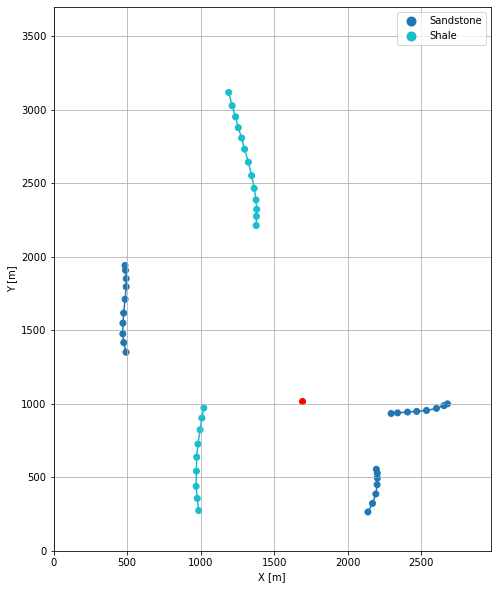

In [19]:
fig, ax = plt.subplots(1, figsize=(10, 10))

interfaces.plot(ax=ax, column='formation', legend=True, aspect='equal')
interfaces_coords.plot(ax=ax, column='formation', legend=True, aspect='equal')
orientations.plot(ax=ax, color='red', aspect='equal')
plt.grid()
ax.set_xlabel('X [m]')
ax.set_ylabel('Y [m]')
ax.set_xlim(0, 2973)
ax.set_ylim(0, 3698)

## GemPy Model Construction

The structural geological model will be constructed using the `GemPy` package. 

In [20]:
import gempy as gp

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


### Creating new Model

In [21]:
geo_model = gp.create_model('Model14')
geo_model

Model14  2022-04-05 11:06

### Initiate Data

In [22]:
gp.init_data(geo_model, [0, 2973, 0, 3698, 0, 1000], [100, 100, 100],
             surface_points_df=interfaces_coords[interfaces_coords['Z'] != 0],
             orientations_df=orientations,
             default_values=True)

Active grids: ['regular']


Model14  2022-04-05 11:06

### Model Surfaces

In [23]:
geo_model.surfaces

,surface,series,order_surfaces,color,id
0,Sandstone,Default series,1,#015482,1
1,Shale,Default series,2,#9f0052,2


### Mapping the Stack to Surfaces

In [24]:
gp.map_stack_to_surfaces(geo_model,
                         {
                          'Strata1': ('Sandstone', 'Shale'),
                         },
                         remove_unused_series=True)
geo_model.add_surfaces('Conglomerate')

,surface,series,order_surfaces,color,id
0,Sandstone,Strata1,1,#015482,1
1,Shale,Strata1,2,#9f0052,2
2,Conglomerate,Strata1,3,#ffbe00,3


### Showing the Number of Data Points

In [25]:
gg.utils.show_number_of_data_points(geo_model=geo_model)

,surface,series,order_surfaces,color,id,No. of Interfaces,No. of Orientations
0,Sandstone,Strata1,1,#015482,1,25,1
1,Shale,Strata1,2,#9f0052,2,22,0
2,Conglomerate,Strata1,3,#ffbe00,3,0,0


### Loading Digital Elevation Model

In [26]:
geo_model.set_topography(
    source='gdal', filepath=file_path + 'raster14.tif')

Cropped raster to geo_model.grid.extent.
depending on the size of the raster, this can take a while...
storing converted file...
Active grids: ['regular' 'topography']


Grid Object. Values: 
array([[  14.865     ,   18.49      ,    5.        ],
       [  14.865     ,   18.49      ,   15.        ],
       [  14.865     ,   18.49      ,   25.        ],
       ...,
       [2965.49242424, 3660.5708502 ,  428.21966553],
       [2965.49242424, 3675.54251012,  427.20385742],
       [2965.49242424, 3690.51417004,  426.23760986]])

### Plotting Input Data

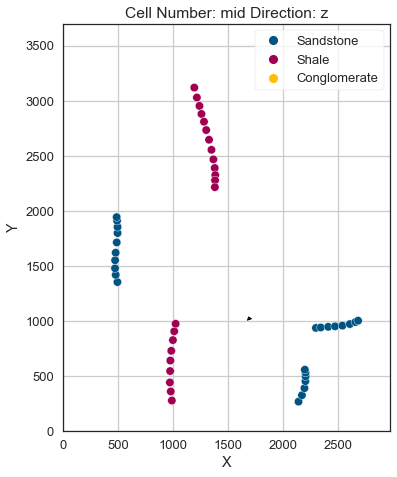

In [27]:
gp.plot_2d(geo_model, direction='z', show_lith=False, show_boundaries=False)
plt.grid()

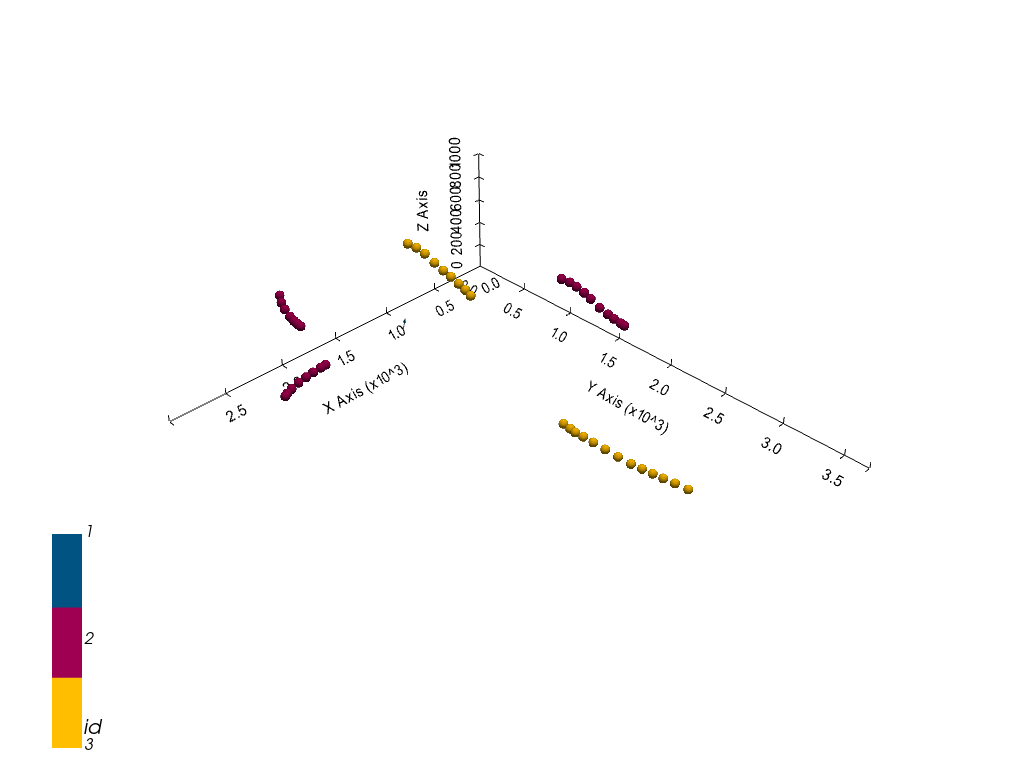

In [28]:
gp.plot_3d(geo_model, image=False, plotter_type='basic', notebook=True)

### Setting the Interpolator

In [29]:
gp.set_interpolator(geo_model,
                    compile_theano=True,
                    theano_optimizer='fast_compile',
                    verbose=[],
                    update_kriging=False
                    )

Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                    values
range             4849.12
$C_o$           559855.55
drift equations       [3]


### Computing Model

In [30]:
sol = gp.compute_model(geo_model, compute_mesh=True)

### Plotting Cross Sections

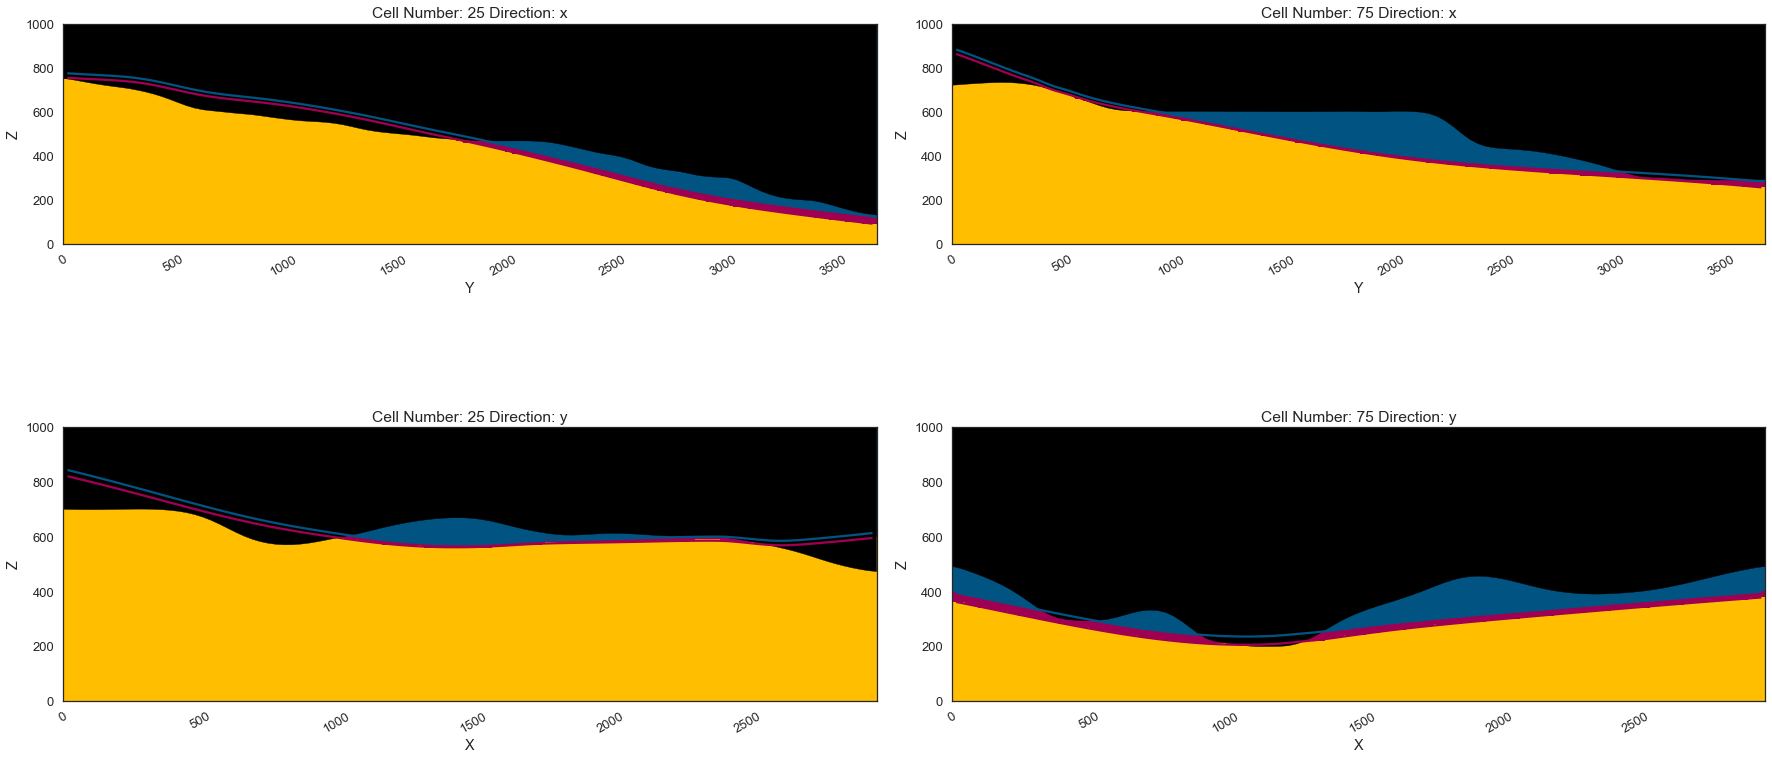

In [31]:
gp.plot_2d(geo_model, direction=['x', 'x', 'y', 'y'], cell_number=[25, 75, 25, 75], show_topography=True, show_data=False)

### Plotting 3D Model

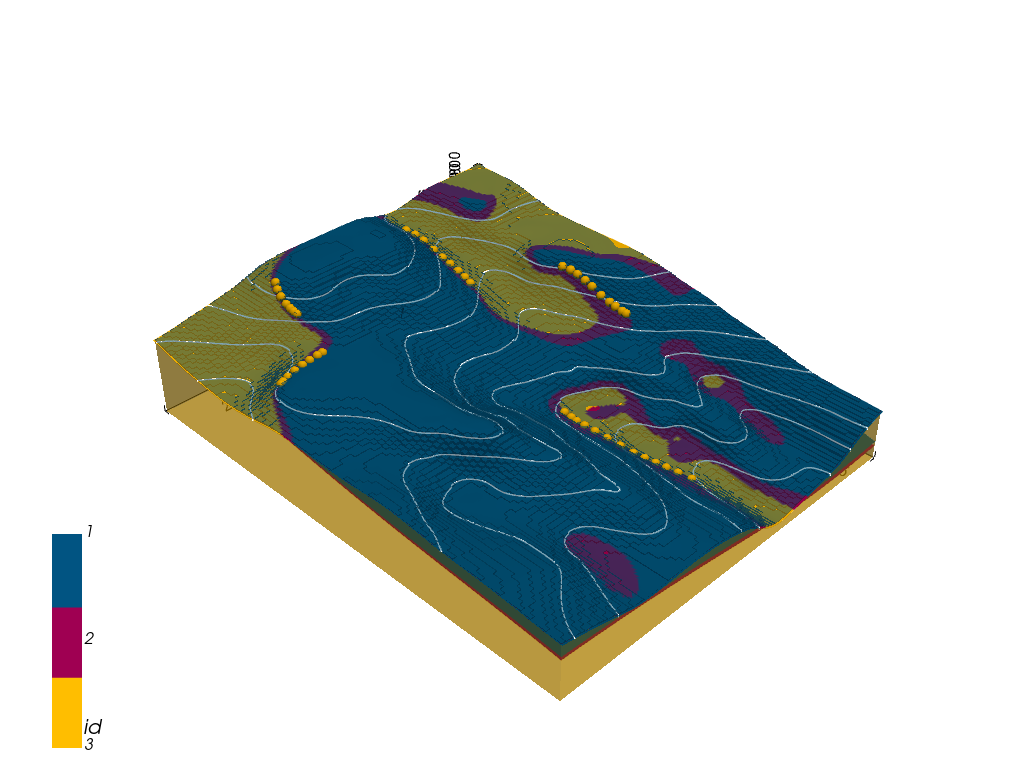

In [32]:
gpv = gp.plot_3d(geo_model, image=False, show_topography=True,
                 plotter_type='basic', notebook=True, show_lith=True)